### Website Performance Analysis

In [1]:
import pandas as pd

In [11]:
df = pd.read_csv("data-export.csv", skiprows= [0])
df.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [17]:
df.shape

(3182, 10)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Session primary channel group (Default channel group)  3182 non-null   object 
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   int64  
 2   Users                                                  3182 non-null   int64  
 3   Sessions                                               3182 non-null   int64  
 4   Engaged sessions                                       3182 non-null   int64  
 5   Average engagement time per session                    3182 non-null   float64
 6   Engaged sessions per user                              3182 non-null   float64
 7   Events per session                                     3182 non-null   float64
 8   Engagement rate                                 

In [13]:
df.describe()

,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
count,3.182000e+03,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2.024043e+09,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470
std,2.695099e+03,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313
min,2.024041e+09,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,2.024041e+09,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000
50%,2.024042e+09,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000
75%,2.024043e+09,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000
max,2.024050e+09,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000


In [14]:
#convert date column to proper format 
df["Date + hour (YYYYMMDDHH)"] = pd.to_datetime(df["Date + hour (YYYYMMDDHH)"], format = "%Y%m%d%H")

df["Users"] = pd.to_numeric(df["Users"])

df["Sessions"] = pd.to_numeric(df["Sessions"])

In [15]:
df.head(2)

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147


In [16]:
#groupying data by date and sum the users and sessions
grouped_data = df.groupby(df["Date + hour (YYYYMMDDHH)"]).agg({"Users": "sum", "Sessions": "sum"})
grouped_data

,Users,Sessions
Date + hour (YYYYMMDDHH),,
2024-04-06 00:00:00,197,270
2024-04-06 01:00:00,107,142
2024-04-06 02:00:00,115,142
2024-04-06 03:00:00,93,122
2024-04-06 04:00:00,79,102
...,...,...
2024-05-03 19:00:00,264,324
2024-05-03 20:00:00,273,327
2024-05-03 21:00:00,315,374


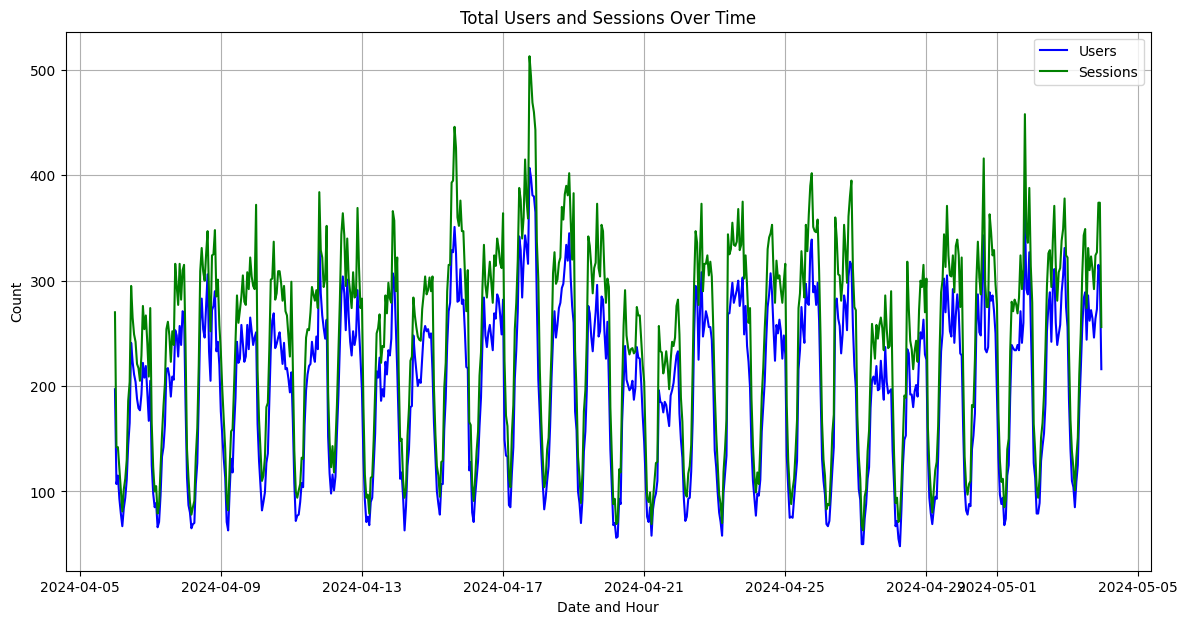

In [18]:
#analyzing the total users ans sessins over time
import matplotlib.pyplot as plt

plt.figure(figsize = (14,7))
plt.plot(grouped_data.index, grouped_data["Users"], label = "Users", color= "blue")
plt.plot(grouped_data.index, grouped_data["Sessions"], label = "Sessions", color = "green")
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
#converting columns to numeric for engagement analysis
df["Engaged sessions"] = pd.to_numeric(df["Engaged sessions"])
df["Average engagement time per session"] = pd.to_numeric(df["Average engagement time per session"])
df["Engaged sessions per user"] = pd.to_numeric(df["Engaged sessions per user"])
df["Events per session"] = pd.to_numeric(df["Events per session"])
df["Engagement rate"] = pd.to_numeric(df["Engagement rate"])

In [23]:
#groupying data by date and calculating mean for engagment metrics
engagement_metrics = df.groupby(df["Date + hour (YYYYMMDDHH)"]).agg({
    "Average engagement time per session" : "mean",
    "Engaged sessions per user" : "mean",
    "Events per session": "mean",
    "Engagement rate" : "mean"
})

In [24]:
engagement_metrics

,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate
Date + hour (YYYYMMDDHH),,,,
2024-04-06 00:00:00,55.070258,0.607673,3.610049,0.450262
2024-04-06 01:00:00,49.115957,0.644213,4.719012,0.489905
2024-04-06 02:00:00,66.270536,0.736716,5.372024,0.595759
2024-04-06 03:00:00,52.273710,0.568105,4.691984,0.446725
2024-04-06 04:00:00,67.222410,0.603943,4.686724,0.494964
...,...,...,...,...
2024-05-03 19:00:00,53.771757,0.568971,6.224420,0.498125
2024-05-03 20:00:00,87.194145,0.436159,6.370794,0.375790
2024-05-03 21:00:00,92.804300,0.546948,6.071114,0.471312


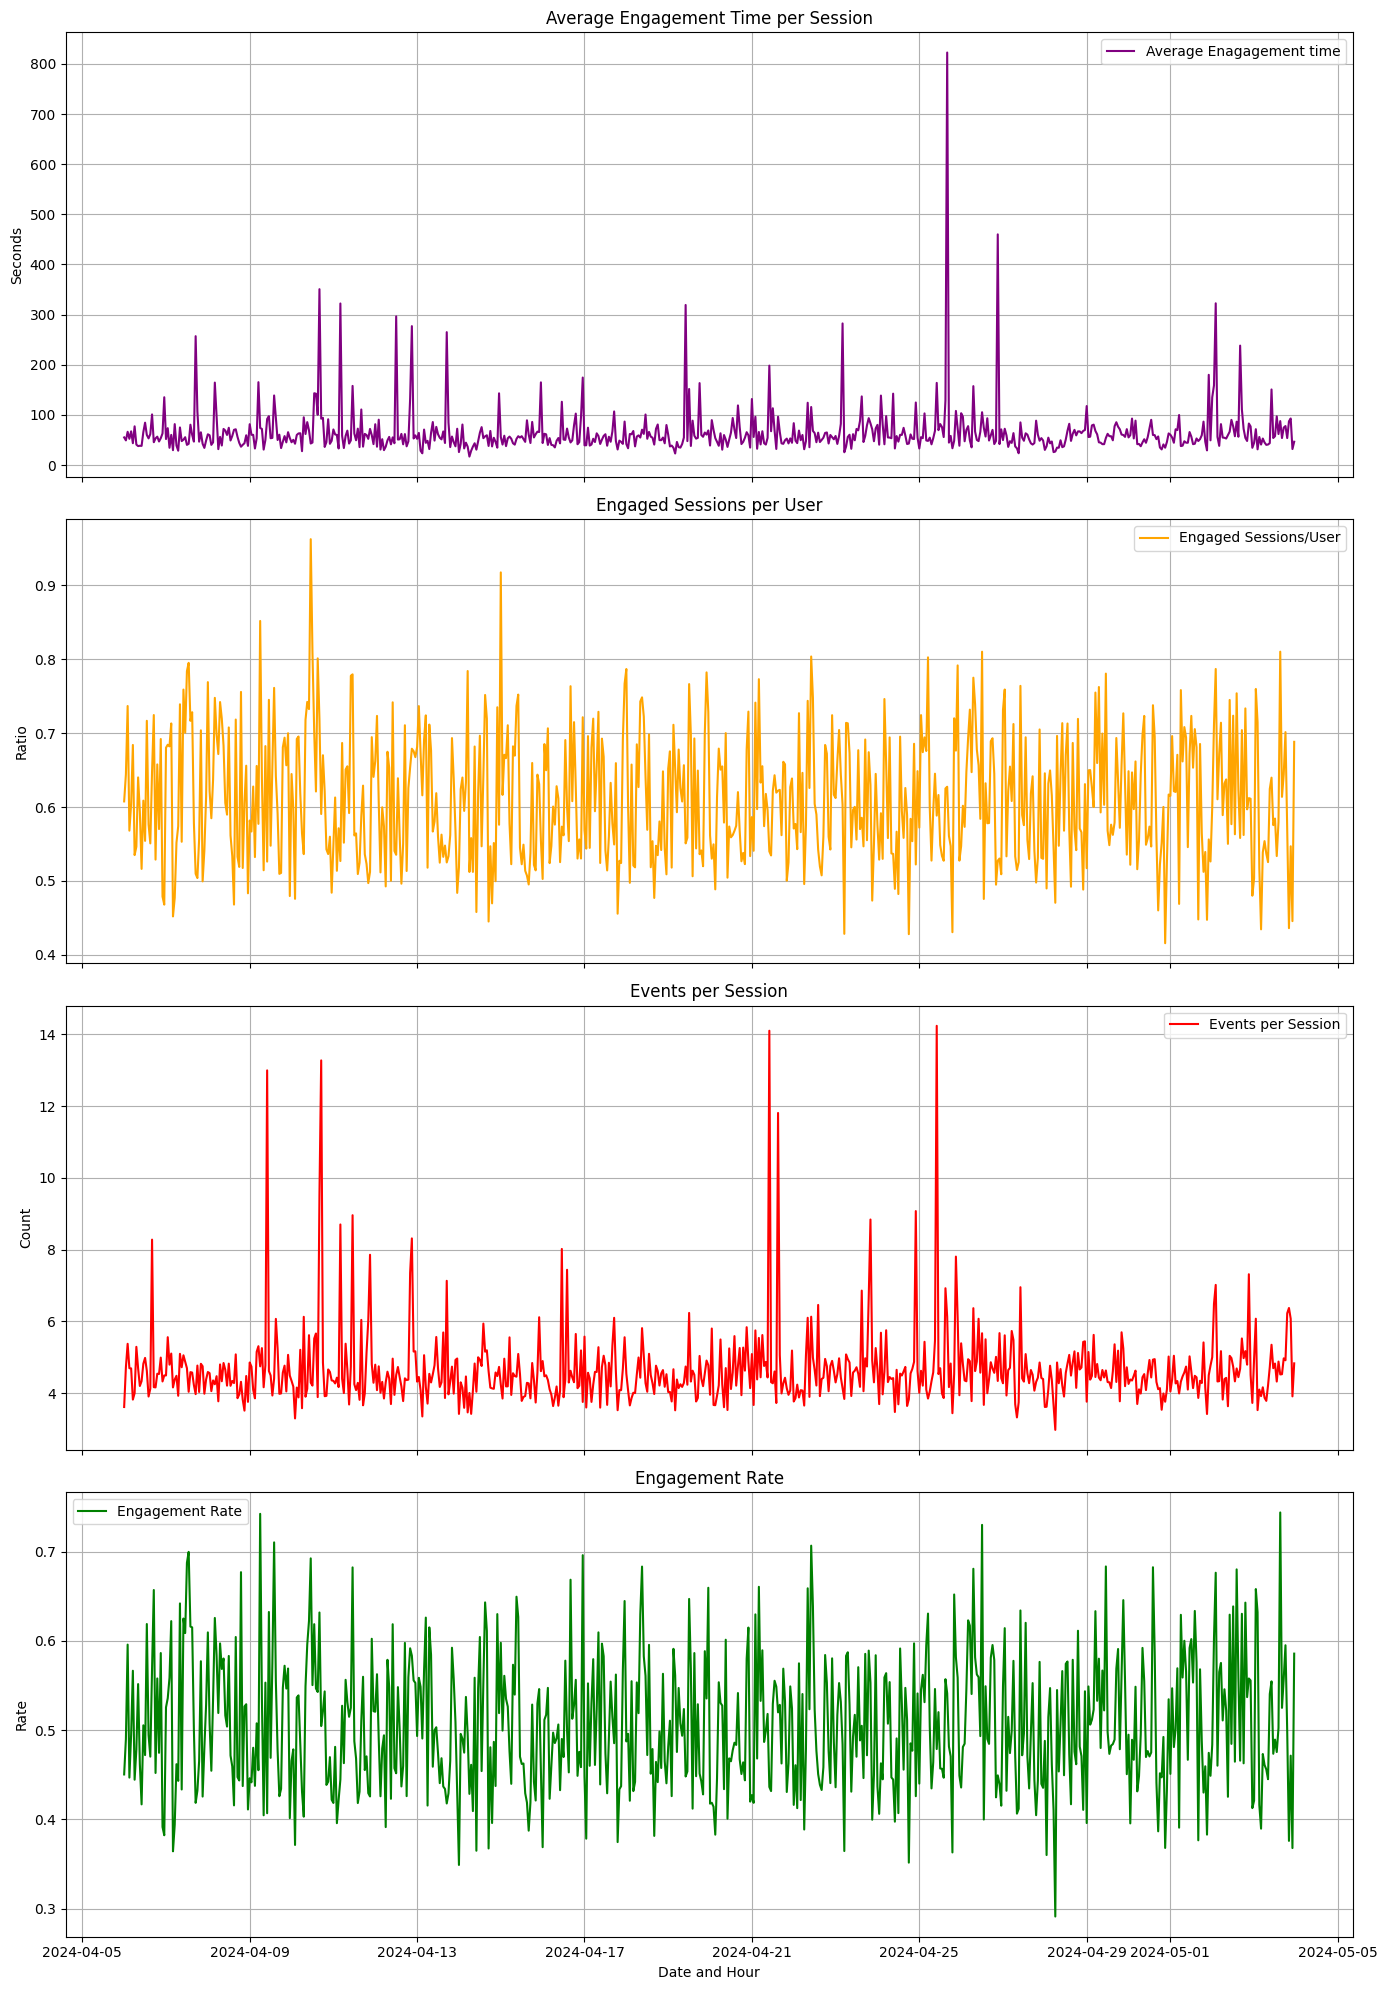

In [25]:
#plotting enagagement metrics
fig, ax = plt.subplots(4,1, figsize = (14,20), sharex = True)

ax[0].plot(engagement_metrics.index, engagement_metrics["Average engagement time per session"], label = "Average Enagagement time", color = "purple")
ax[0].set_title("Average Engagement Time per Session")
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='red')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='green')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

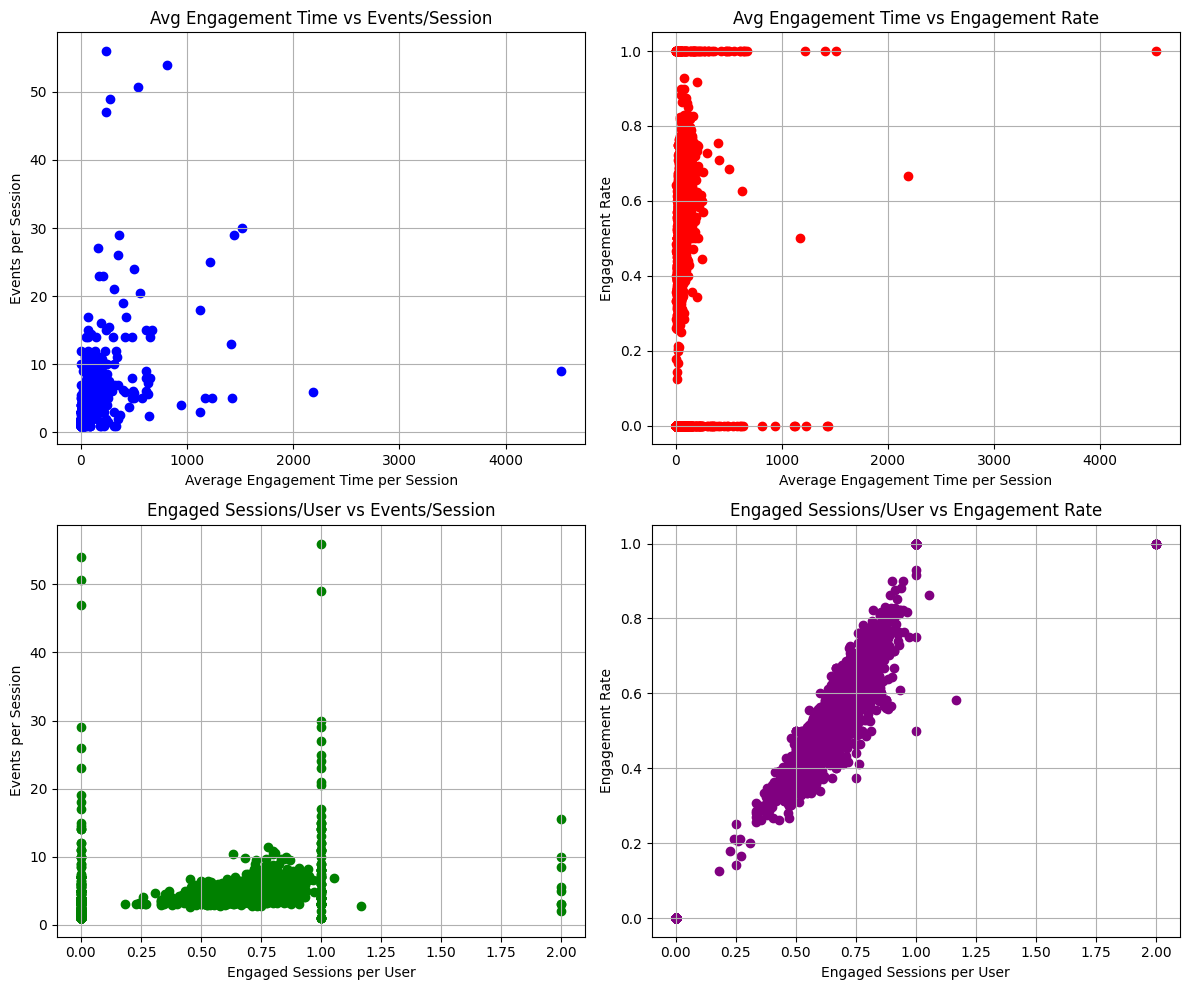

In [30]:
#correlations between them
fig, axes = plt.subplots(2, 2, figsize = (12, 10))

axes[0, 0].scatter(df["Average engagement time per session"], df["Events per session"], color = "blue")
axes[0, 0].set_title("Avg Engagement Time vs Events/Session")
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True) 

axes[0, 1].scatter(df['Average engagement time per session'], df['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

axes[1, 0].scatter(df['Engaged sessions per user'], df['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

axes[1, 1].scatter(df['Engaged sessions per user'], df['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

In [31]:
#Channel performance analysis
#grouping data by channel and agg with relevant metrics

channel_performance = df.groupby("Session primary channel group (Default channel group)").agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

In [32]:
channel_performance

,Users,Sessions,Engaged sessions,Engagement rate,Events per session
Session primary channel group (Default channel group),,,,,
Direct,30042,37203,17243,0.455723,4.152344
Email,2,3,1,0.333333,3.333333
Organic Search,28387,33372,19425,0.578906,4.070839
Organic Social,47572,60627,32697,0.541180,4.905193
Organic Video,123,141,109,0.760000,7.524000
Referral,26774,30990,20653,0.660882,5.673981
Unassigned,540,559,4,0.007514,3.533470


In [33]:
#normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

In [34]:
channel_performance

,Users,Sessions,Engaged sessions,Engagement rate,Events per session,Normalized Engagement Rate,Normalized Events per Session
Session primary channel group (Default channel group),,,,,,,
Direct,30042,37203,17243,0.455723,4.152344,0.599636,0.551880
Email,2,3,1,0.333333,3.333333,0.438596,0.443027
Organic Search,28387,33372,19425,0.578906,4.070839,0.761719,0.541047
Organic Social,47572,60627,32697,0.541180,4.905193,0.712079,0.651939
Organic Video,123,141,109,0.760000,7.524000,1.000000,1.000000
Referral,26774,30990,20653,0.660882,5.673981,0.869582,0.754118
Unassigned,540,559,4,0.007514,3.533470,0.009886,0.469627


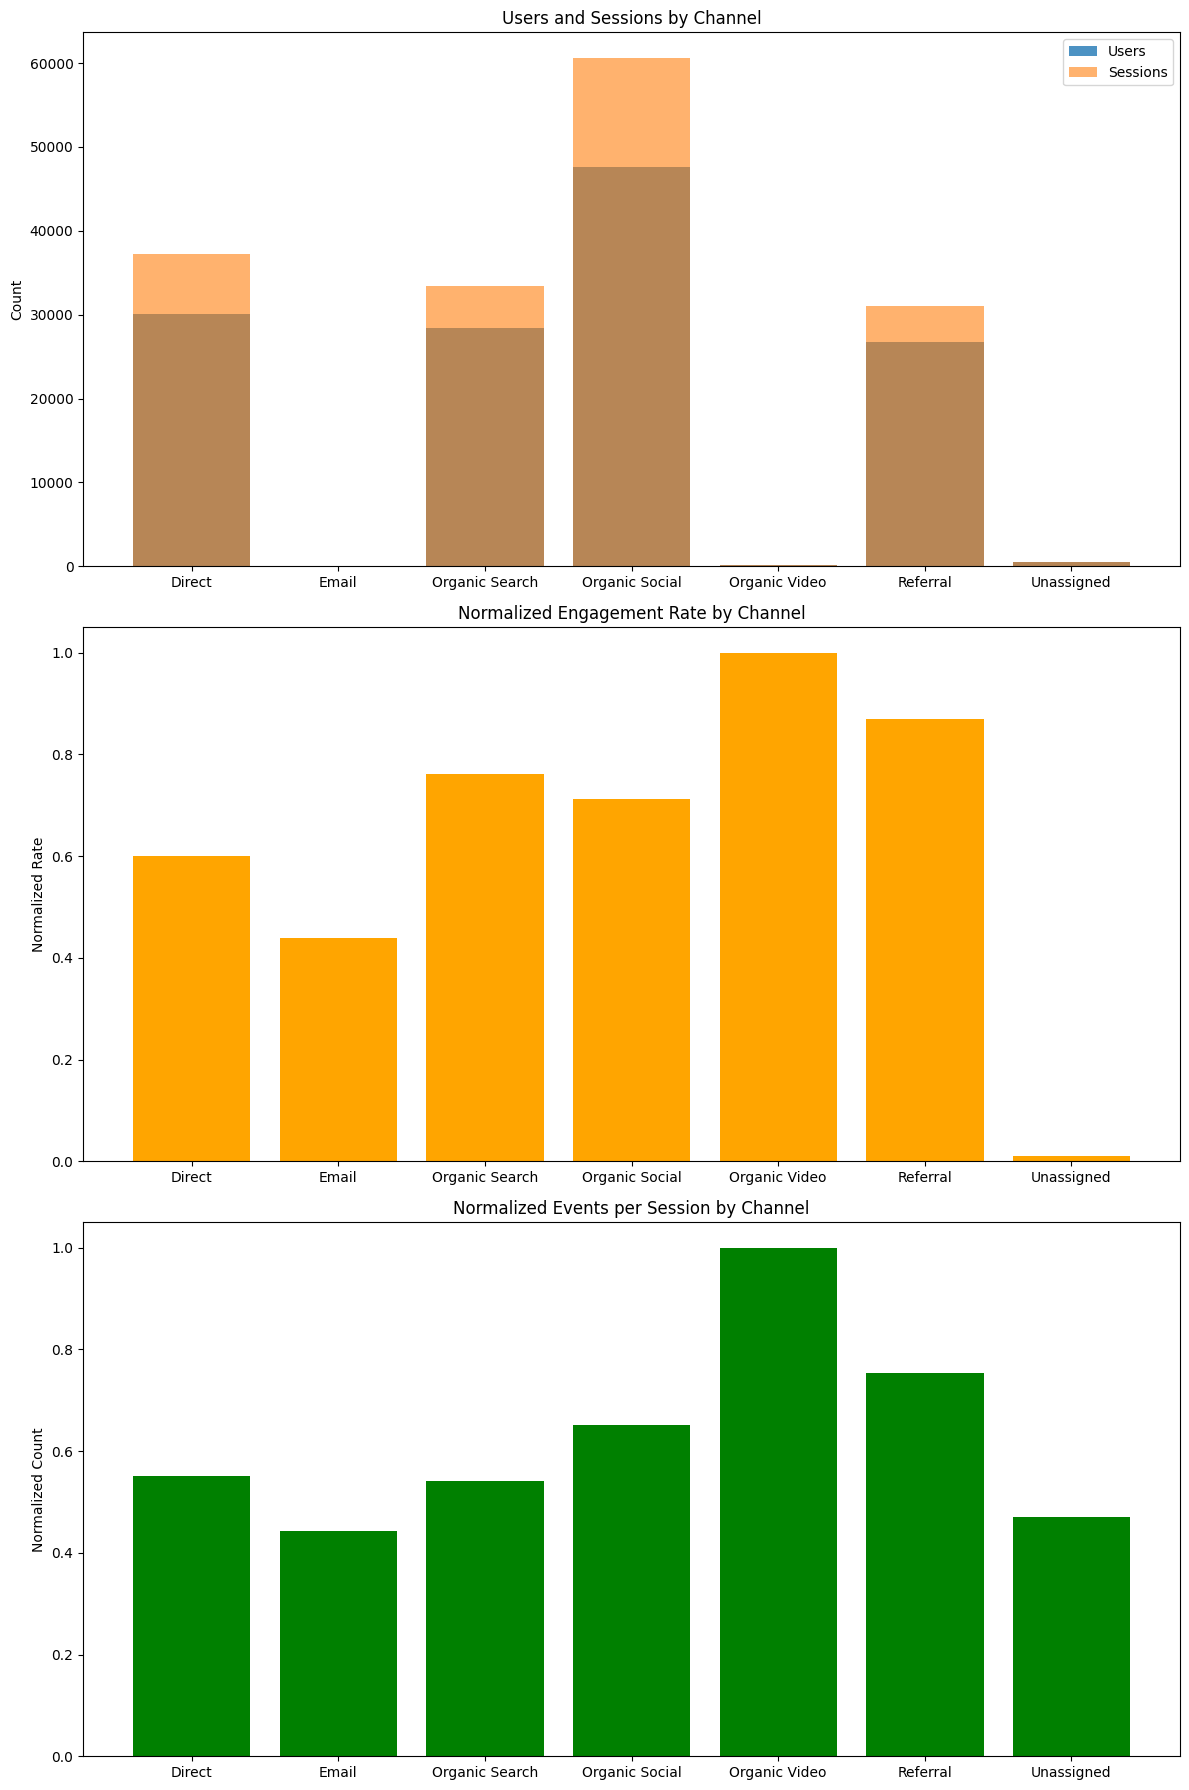

In [35]:
#plotting channel performace metrics
fig, ax = plt.subplots(3,1, figsize= (12,18))

ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


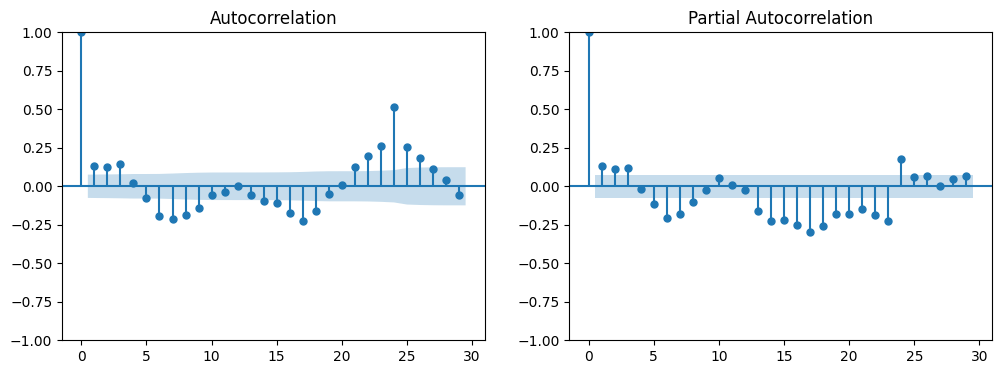

In [36]:
#forecasting website traffic for next 24 hours
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = grouped_data["Sessions"].asfreq("H").fillna(method = "ffill")
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

#ploting ACF and PACF of time series
fig, axes = plt.subplots(1,2, figsize = (12, 4))
plot_acf(differenced_series, ax= axes[0])
plot_pacf(differenced_series, ax= axes[1])
plt.show()

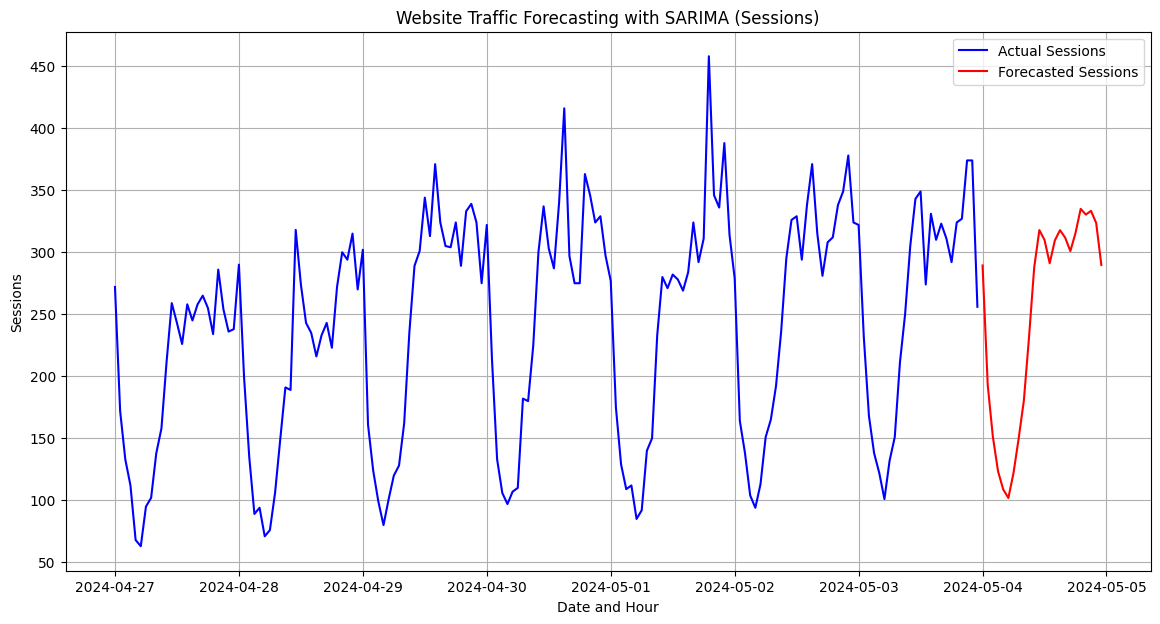

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24


sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)

# plotting the actual data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()

- Session Analysis: Understanding traffic trends.
- User Engagement Analysis: Gauging the depth of user interaction.
- Channel Performance: Evaluating which channels are most effective.
- Website Traffic Forecasting: Predicting future traffic patterns